<a href="https://colab.research.google.com/github/SIDIBEMoussa/Simple_training/blob/main/Bagging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from sklearn.datasets import make_moons

In [11]:
from sklearn.ensemble import BaggingClassifier

In [12]:
from sklearn.model_selection import train_test_split as tts

In [40]:
make_moons(n_samples=5,noise=0.25)

(array([[ 0.98898729,  0.12431258],
        [ 1.32328015, -0.51237878],
        [-0.75639567,  0.12428643],
        [ 1.95532967,  0.46222816],
        [-0.39006106,  0.54609153]]), array([0, 1, 0, 1, 1]))

In [13]:
X,y=make_moons(n_samples=1000,noise=0.25)

In [38]:
X

array([[ 1.82483516,  0.32217936],
       [-0.31706204,  1.33290956],
       [ 1.92910361,  0.7730974 ],
       ...,
       [ 1.77910001,  0.29904675],
       [ 1.65404471, -0.22870445],
       [ 0.25180471, -0.37661425]])

In [39]:
y

array([1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [14]:
X_train,X_test,y_train,y_test=tts(X,y,stratify=y)

In [15]:
bg=BaggingClassifier(n_estimators=25)

In [16]:
bg.fit(X_train,y_train)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=25,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [17]:
pip install mglearn

     |████████████████████████████████| 542kB 4.2MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=a367bfff8e89304dbae28b9a794377d34bb953c4a5e184952e2b966268558189
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


In [18]:
from mglearn.plot_interactive_tree import plot_tree_partition
from mglearn.plot_2d_separator import plot_2d_separator
from mglearn.tools import discrete_scatter
import matplotlib.pyplot as plt

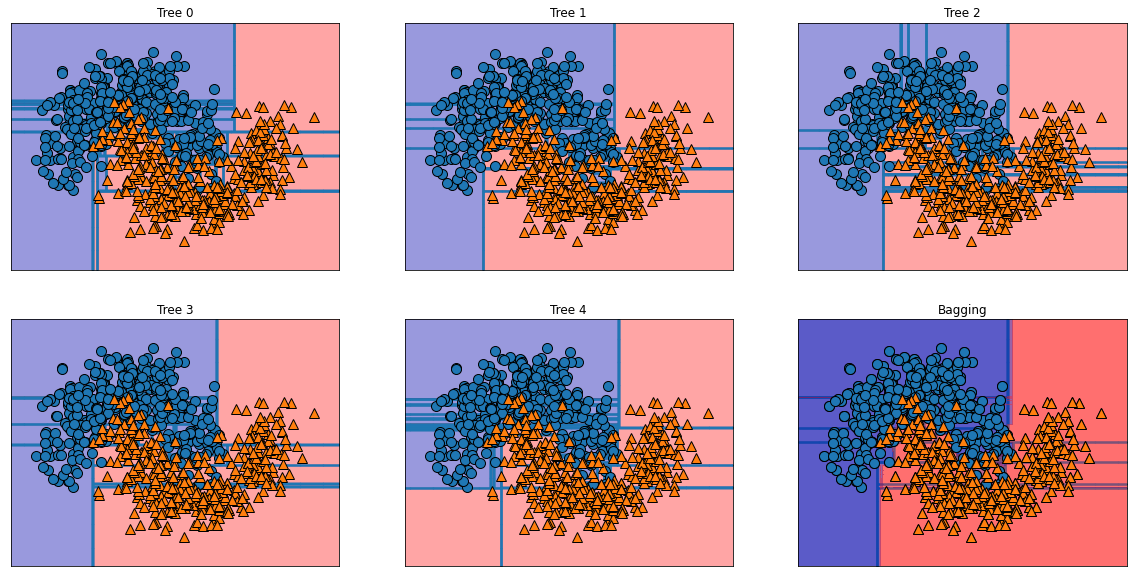

In [19]:
fig,axes=plt.subplots(2,3,figsize=(20,10))

for i,(ax,tree) in enumerate(zip(axes.ravel(),bg.estimators_)):
  ax.set_title("Tree {}".format(i))
  plot_tree_partition(X_train,y_train,tree,ax=ax)
plot_2d_separator(bg,X_train,fill=True, ax=axes[-1,-1],alpha=.4)
axes[-1,-1].set_title("Bagging")
discrete_scatter(X_train[:,0],X_train[:,1],y_train)
plt.show()

In [20]:
prediction=bg.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
print("acc:{:.2%}".format(accuracy_score(y_test,prediction)))

acc:94.00%


La particularité de Bagging est qu'il est capable de combiner plus plusieurs estimaeurs afin d'être la meilleur possible

In [23]:
error=[]
for i in range(1,100):
  bagging=BaggingClassifier(n_estimators=i)
  bagging.fit(X_train,y_train)
  y_pred=bagging.predict(X_test)
  error.append(1-accuracy_score(y_pred,y_test))


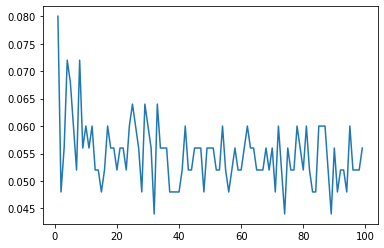

In [24]:
x=range(1,100)
plt.plot(x,error)
plt.show()

In [25]:
min(error)

0.04400000000000004

In [26]:
a=error.index(min(error))
a

31

In [27]:
a

31

In [28]:
bagging=BaggingClassifier(n_estimators=a)
bagging.fit(X_train,y_train)
y_pred=bagging.predict(X_test)
print("acc:{:.2%}".format(accuracy_score(y_test,y_pred)))

acc:93.60%


In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
neighbor=KNeighborsClassifier(n_neighbors=1)
neighbor.fit(X_test,y_test)
y_pred=neighbor.predict(X_test)
print("acc:{:.2%}".format(accuracy_score(y_test,y_pred)))

acc:100.00%


In [31]:
y_test==y_pred

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

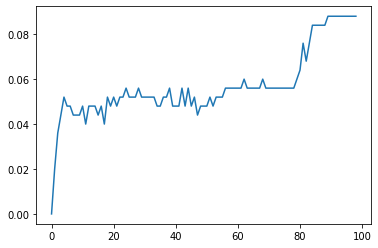

In [32]:
errorN=[]
for i in range(1,100):
  neighbor=KNeighborsClassifier(n_neighbors=i)
  neighbor.fit(X_test,y_test)
  y_pred=neighbor.predict(X_test)
  errorN.append(1-accuracy_score(y_test,y_pred))

plt.plot(errorN)
#errorN.index(min(errorN))